Modify any of the numbers and rerun the cell.

## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

In [91]:
#By Paawan Purdhani
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from pandas import Series,DataFrame

In [3]:
exam_df = pd.read_csv('data/exams.csv')

In [4]:
exam_df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [78]:
prep = exam_df[exam_df.test_prep_course == 'completed']
no_prep = exam_df[exam_df.test_prep_course == 'none']

In [6]:
exam_df.test_prep_course.unique()

array(['none', 'completed'], dtype=object)

In [7]:
prep.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46


In [8]:
#Average test scores of students that have taken test prep course
prep.reading.mean()

73.89385474860335

In [13]:
no_prep.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [9]:
#Average test scores of students that have taken no prep courses
no_prep.reading.mean()

66.53426791277259

In [16]:
exam_df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
#Average score of students in different education levels
exam_df.groupby('parent_education_level').mean()

,math,reading,writing
parent_education_level,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [11]:
#Data Visualizations

In [14]:
exam_df.shape

(1000, 8)

In [12]:
exam_df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
#Math Results of Students who have taken prep course Vs who have not taken prep course

In [13]:
import plotly.express as px

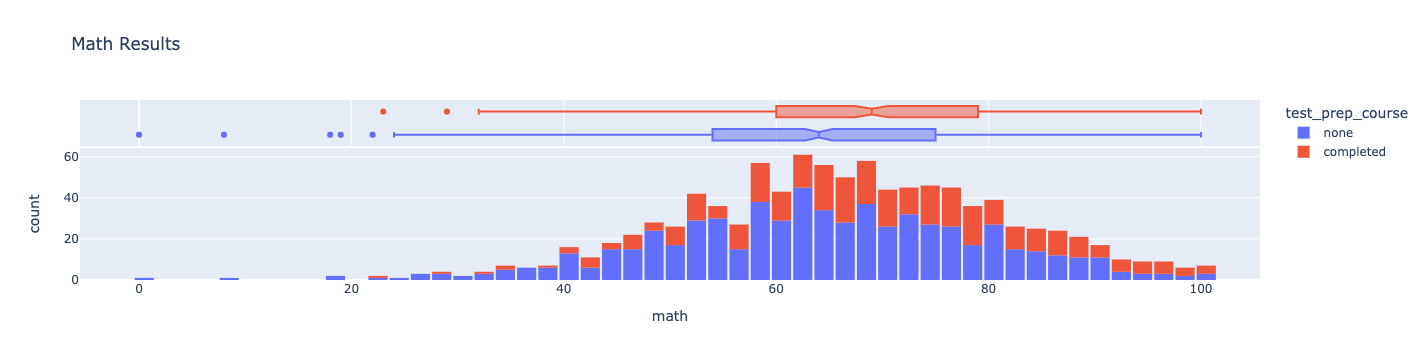

In [21]:
fig = px.histogram(exam_df,x = 'math',marginal = 'box',color = 'test_prep_course',title = 'Math Results')
fig.update_layout(bargap = 0.1)
fig.show()

In [23]:
#Reading Results of students who have taken prep course Vs who have not taken prep course

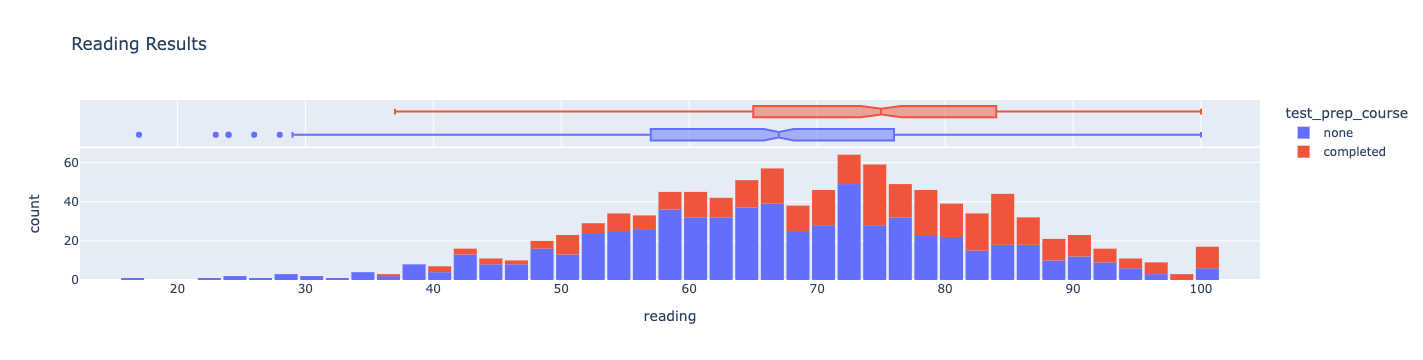

In [27]:
fig = px.histogram(exam_df,x = 'reading',marginal = 'box',color = 'test_prep_course',title = 'Reading Results')
fig.update_layout(bargap = 0.1)
fig.show()

In [25]:
#Reading Results of students who have taken prep course Vs who have not taken prep course

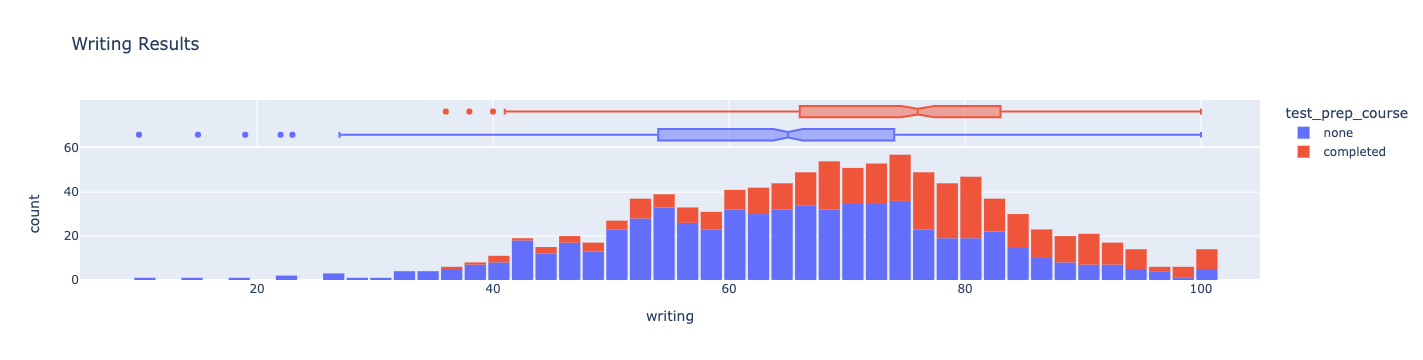

In [26]:
fig = px.histogram(exam_df,x = 'writing',marginal = 'box',color = 'test_prep_course',title = 'Writing Results')
fig.update_layout(bargap = 0.1)
fig.show()

In [28]:
degree = exam_df[['parent_education_level','math','reading','writing']]

In [29]:
degree.head()

,parent_education_level,math,reading,writing
0,bachelor's degree,72,72,74
1,some college,69,90,88
2,master's degree,90,95,93
3,associate's degree,47,57,44
4,some college,76,78,75


In [30]:
degree.parent_education_level.value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parent_education_level, dtype: int64

In [47]:
level = {"bachelor's degree": 'b','some high school':'shs','some college':'c', "master's degree":'ms',"associate's degree":'as','high school':'hs'}

In [48]:
degree['education_level'] = degree['parent_education_level'].map(level)

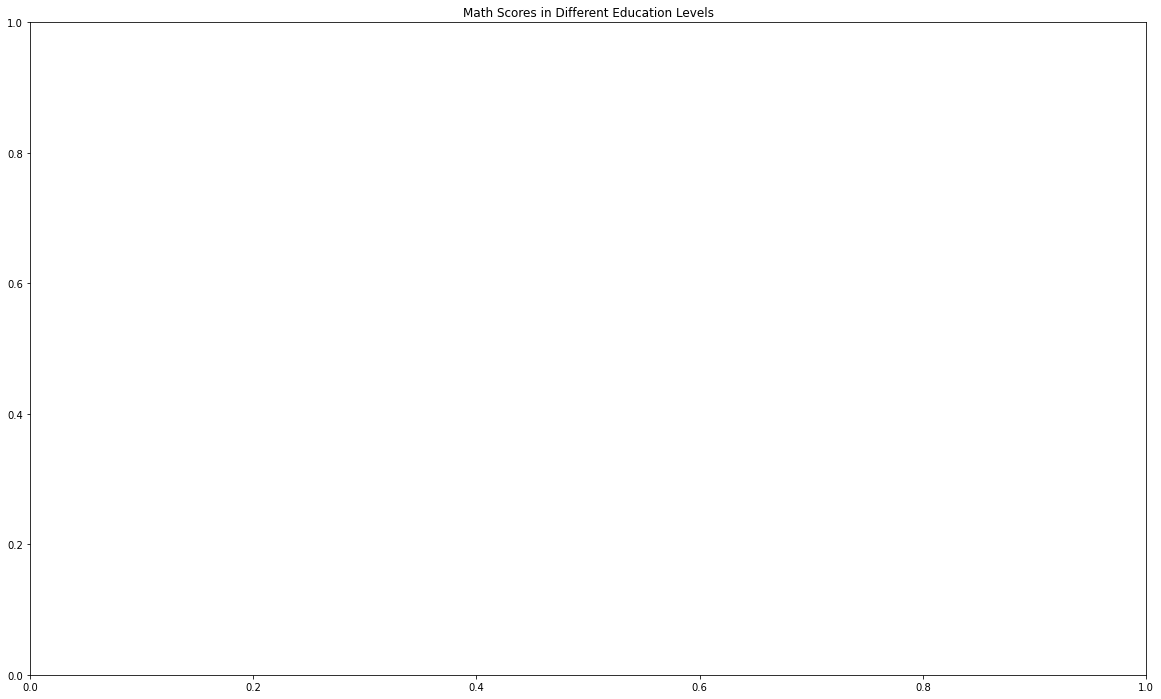

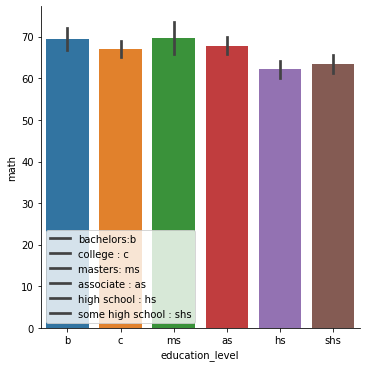

In [57]:
#Visualization for math score in different education levels
plt.title('Math Scores in Different Education Levels');
sns.catplot(x = 'education_level',y = 'math',data = degree,kind = 'bar');
plt.legend(['bachelors:b','college : c','masters: ms','associate : as','high school : hs','some high school : shs']);
plt.show();

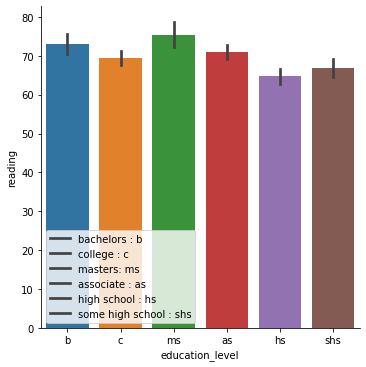

In [54]:
#Visualization of reading scores in different education levels
sns.catplot(x = 'education_level',y = 'reading',data = degree,kind = 'bar')
plt.legend(['bachelors : b','college : c','masters: ms','associate : as','high school : hs','some high school : shs']);
plt.show();

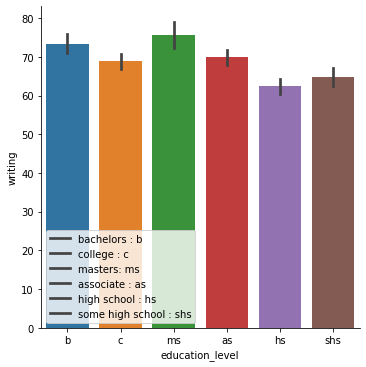

In [56]:
#Visualization of writing scores in different education levels
sns.catplot(x = 'education_level',y = 'writing',data = degree,kind = 'bar')
plt.legend(['bachelors : b','college : c','masters: ms','associate : as','high school : hs','some high school : shs']);
plt.show();

In [55]:
#Optional Questions

In [60]:
diff_levels = prep.parent_education_level.value_counts()

In [61]:
diff_levels

associate's degree    82
some college          77
some high school      77
high school           56
bachelor's degree     46
master's degree       20
Name: parent_education_level, dtype: int64

In [62]:
mylabels = (['Associate','Some College','Some High School','High School','Bachelors','Masters'])

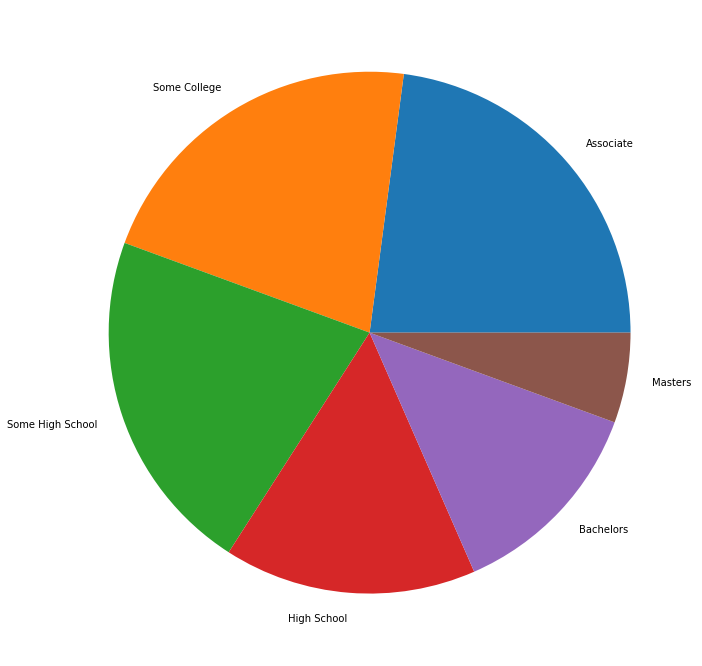

In [65]:
plt.pie(diff_levels,labels = mylabels)
plt.show()

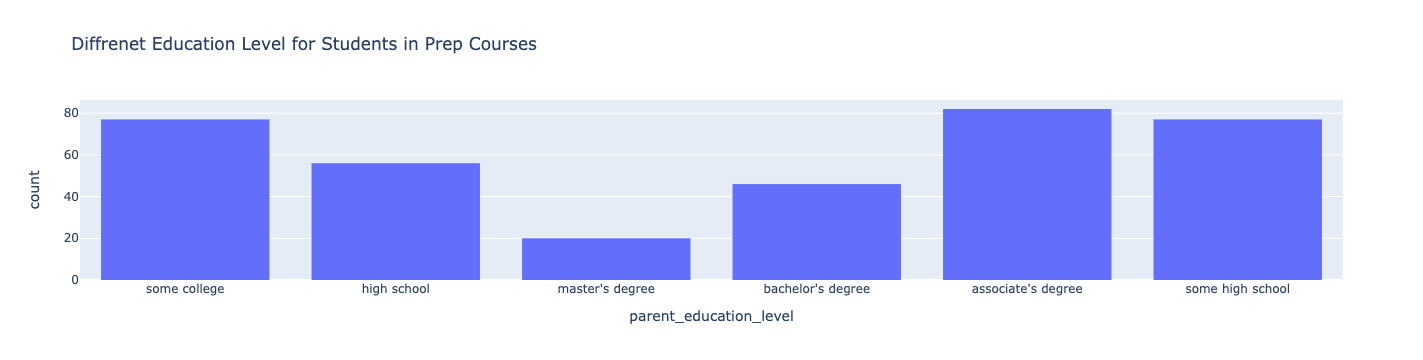

In [73]:
fig = px.histogram(prep,x = 'parent_education_level',title = 'Diffrenet Education Level for Students in Prep Courses')
fig.show()

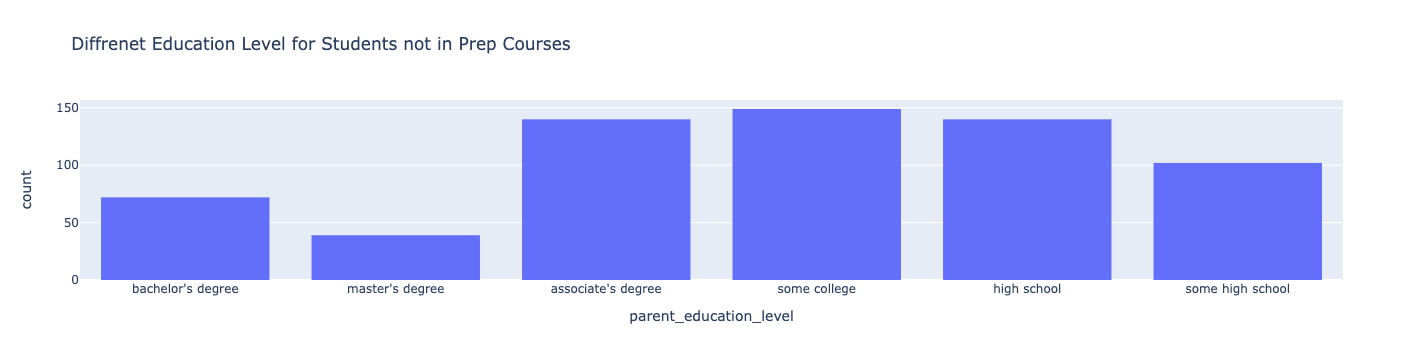

In [74]:
fig = px.histogram(no_prep,x = 'parent_education_level',title = 'Diffrenet Education Level for Students not in Prep Courses')
fig.show()

In [83]:
#Average Marks of students in different education levels who have taken prep courses
prep.groupby('parent_education_level').mean()

,math,reading,writing
parent_education_level,,,
associate's degree,71.829268,76.170732,76.817073
bachelor's degree,73.282609,76.739130,78.695652
high school,65.000000,67.839286,68.053571
master's degree,70.600000,78.250000,80.100000
some college,71.454545,75.987013,76.519481
some high school,66.701299,70.948052,70.363636


In [84]:
#Average Marks of students in different education levels who have not taken prep courses
no_prep.groupby('parent_education_level').mean()

,math,reading,writing
parent_education_level,,,
associate's degree,65.571429,67.857143,65.842857
bachelor's degree,66.902778,70.611111,69.986111
high school,60.992857,63.450000,60.207143
master's degree,69.307692,73.897436,73.410256
some college,64.892617,66.087248,64.872483
some high school,61.078431,63.911765,60.754902


In [86]:
#Correlation in Subjects
exam_df.corr()

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'Correlation in Subjects')

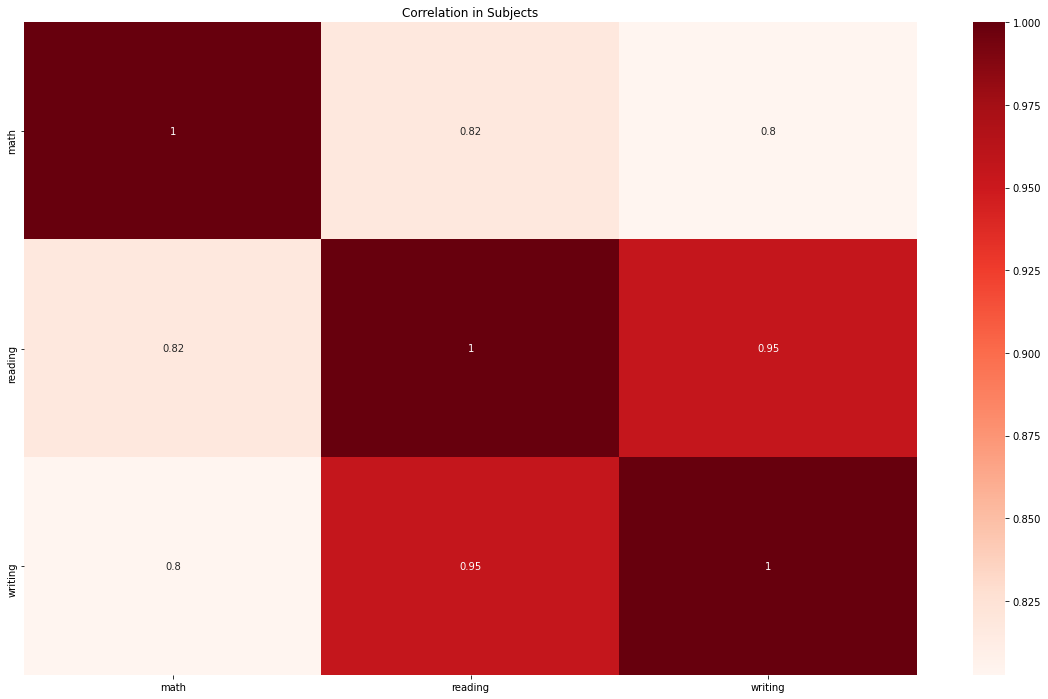

In [90]:
sns.heatmap(exam_df.corr(),cmap = 'Reds',annot = True)
plt.title("Correlation in Subjects")